In [140]:
#MODULE NAME
import os
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import skimage.exposure as exposure
import pandas as pd
import numpy as np
import subprocess
import snappy
import imageio
import rasterio as rio
import rasterstats as rs
import rasterio.plot 
from glob import iglob
import geopandas as gpd
from pyspatialml import Raster
import seaborn as sns
from rasterio.plot import show
get_ipython().run_line_magic('matplotlib', 'inline')
from osgeo import gdal
import prosail
from prosail import spectral_lib
import numpy as np
import numpy.matlib
import numpy as np
from numpy.random import seed
from numpy.random import rand
import numpy.matlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot
from sklearn.pipeline import Pipeline

In [130]:
dataframe = r"C:\Users\bongo\OneDrive\Desktop\Boostraping\PLSR\dataset1.xlsx"
df = pd.read_excel(dataframe)
df

,carotenoid,400,401,402,403,404,405,406,407,408,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,3.282087,0.065619,0.065127,0.065294,0.065634,0.065548,0.065315,0.065404,0.065966,0.066737,...,0.111850,0.111529,0.111054,0.111007,0.110787,0.110174,0.109856,0.109756,0.109782,0.109768
1,4.162009,0.069785,0.069826,0.070362,0.070876,0.070950,0.071029,0.071384,0.071899,0.071777,...,0.113591,0.114505,0.114394,0.113856,0.113320,0.112157,0.111929,0.112260,0.111867,0.112044
2,4.998477,0.063132,0.062747,0.062611,0.062457,0.062039,0.062145,0.062412,0.062598,0.062687,...,0.090129,0.090856,0.090595,0.089639,0.089578,0.089729,0.089387,0.089614,0.089466,0.087800
3,5.006669,0.047176,0.047795,0.048406,0.048725,0.048811,0.049058,0.049382,0.049676,0.049807,...,0.082908,0.081787,0.081613,0.081688,0.081208,0.080860,0.080834,0.080509,0.079817,0.079307
4,3.347456,0.054662,0.054591,0.054374,0.054462,0.055194,0.055425,0.055831,0.056427,0.055878,...,0.092096,0.091577,0.091319,0.091903,0.091800,0.091221,0.090924,0.090471,0.090164,0.090046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,8.203996,0.039234,0.040750,0.040579,0.038032,0.038219,0.038509,0.038430,0.038253,0.039037,...,0.025541,0.025518,0.025478,0.025245,0.024947,0.025206,0.025385,0.025038,0.025109,0.024934
156,2.987266,0.032714,0.033617,0.033586,0.032551,0.033513,0.033846,0.033733,0.033790,0.033868,...,0.019435,0.019674,0.019720,0.019509,0.019437,0.019131,0.019313,0.019316,0.018856,0.018748
157,7.809856,0.030664,0.032800,0.033370,0.031739,0.031401,0.031499,0.031277,0.030742,0.032367,...,0.019633,0.019804,0.019681,0.020107,0.020392,0.019958,0.019666,0.019450,0.018931,0.018510
158,8.508983,0.030021,0.031987,0.033174,0.032157,0.031086,0.029949,0.028847,0.028381,0.031030,...,0.018495,0.017909,0.017592,0.017612,0.017643,0.017693,0.017712,0.017950,0.017709,0.017294


In [3]:
X = df.iloc[:, 1:]
y = df.iloc[:,0]

In [141]:
RF_bands = df[[519, 520, 525, 526, 527, 560, 561, 562, 563, 565, 566, 573, 578, 588, 589, 594, 602, 604, 608, 609, 613, 699, 708, 709, 710, 711, 713]]
#y_data = df[["carotenoid"]]

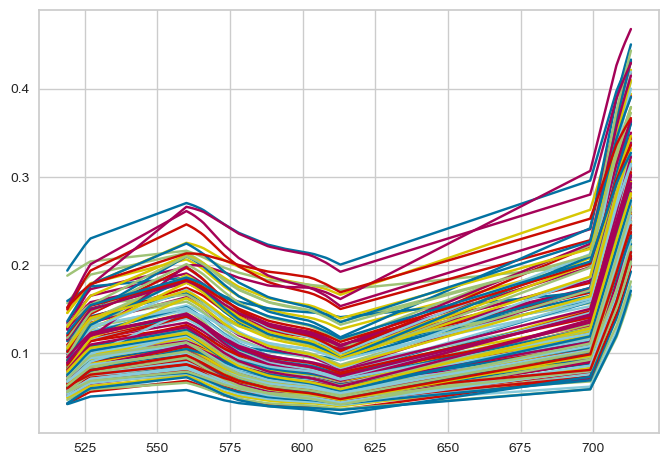

In [143]:
plt.plot(RF_bands.T);

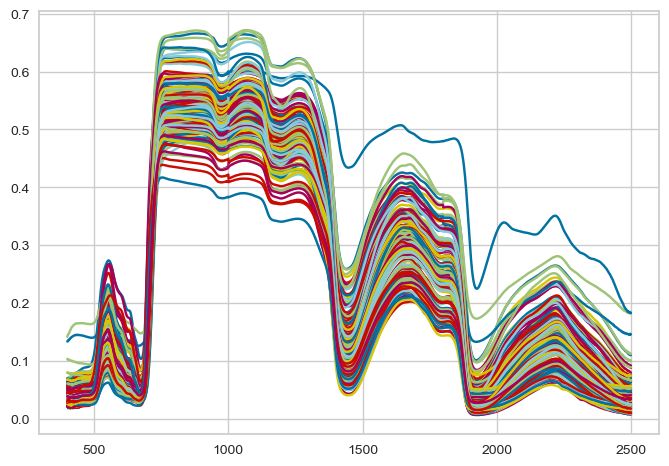

In [5]:
plt.plot(X.T);

### First a function for better control of the PROSPECT call

In [106]:
np.random.seed(0)
krange=10000
n= 1.2
chloro= rand(krange)*80
caroten=rand(krange)*15
brown=0
EWT=rand(krange)*0.15
LMA=rand(krange)*0.05

In [107]:
rho = np.zeros((krange,2101))
for i in range(krange):
    wl, rho[i,:], tau = prosail.run_prospect(n, chloro[i], caroten[i], brown, EWT[i], LMA[i], prospect_version='5')

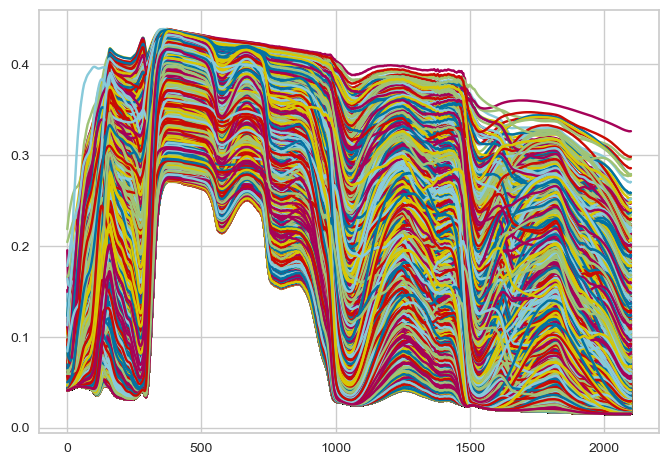

In [108]:
plt.plot(rho.T);

In [135]:
df1 = pd.DataFrame(rho.reshape(-1, 2101), columns=list(wl))
#pd_traits0500.columns = ["cab","cw","cm","lai"]
df1 = df1[[519, 520, 525, 526, 527, 560, 561, 562, 563, 565, 566, 573, 578, 588, 589, 594, 602, 604, 608, 609, 613, 699, 708, 709, 710, 711, 713]]
df1

,519,520,525,526,527,560,561,562,563,565,...,604,608,609,613,699,708,709,710,711,713
0,0.055212,0.056991,0.065875,0.067439,0.068882,0.071575,0.070888,0.070127,0.069297,0.067447,...,0.045041,0.043644,0.043250,0.041672,0.071559,0.132454,0.139146,0.145772,0.152310,0.165167
1,0.043023,0.044159,0.050738,0.052077,0.053377,0.062325,0.061658,0.060922,0.060123,0.058359,...,0.038940,0.037894,0.037607,0.036485,0.062217,0.131574,0.140236,0.149009,0.157852,0.175794
2,0.053008,0.054613,0.062468,0.063799,0.065001,0.063764,0.063162,0.062498,0.061774,0.060169,...,0.041226,0.040097,0.039782,0.038534,0.063445,0.117504,0.123569,0.129587,0.135538,0.147269
3,0.098633,0.102118,0.115065,0.116358,0.117166,0.081180,0.080330,0.079386,0.078354,0.076055,...,0.048436,0.046721,0.046234,0.044287,0.081565,0.161044,0.170085,0.179109,0.188078,0.205922
4,0.066625,0.069128,0.081794,0.084120,0.086316,0.100058,0.099105,0.098042,0.096875,0.094259,...,0.060566,0.058249,0.057579,0.054854,0.100787,0.181840,0.190332,0.198697,0.206909,0.222961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.059852,0.062047,0.071972,0.073425,0.074629,0.061767,0.061103,0.060371,0.059576,0.057823,...,0.038638,0.037614,0.037333,0.036239,0.061659,0.131373,0.140148,0.149051,0.158035,0.176305
99996,0.079132,0.082128,0.095396,0.097368,0.099041,0.086836,0.085943,0.084950,0.083864,0.081438,...,0.051702,0.049797,0.049253,0.047066,0.087403,0.168947,0.178026,0.187059,0.196012,0.213747
99997,0.057357,0.059156,0.066499,0.067359,0.067968,0.050892,0.050415,0.049893,0.049328,0.048092,...,0.034966,0.034313,0.034140,0.033477,0.050220,0.099062,0.105238,0.111483,0.117770,0.130478
99998,0.073957,0.076672,0.088550,0.090261,0.091684,0.077850,0.077051,0.076164,0.075196,0.073038,...,0.047130,0.045525,0.045071,0.043254,0.078150,0.152195,0.160566,0.168908,0.177188,0.193620


## Calculate RMSE between simulated and measured

In [136]:
meas=np.array(RF_bands)#/np.mean(np.array(X))*np.mean(np.array(df))
car = []
for i in np.arange(160):
    mses=np.sum((np.array(df1)-meas[i,:])**2,axis=1)
    ind=np.argmin(mses)
    car.append(caroten[ind])
    print(ind, mses[ind])
    
car = pd.DataFrame(car, columns = ['caroten'])

53033 0.021173018329905983
75939 0.005946374100469941
26301 0.002921999628196253
52517 0.0024494143355974756
50193 0.005157739609344278
90256 0.0008996460546151485
295 0.005027701881690513
5576 0.0015449313945130644
94197 0.004409073628249734
33334 0.005242395262117033
1875 7.257623724250936e-05
39313 0.00026638766916633203
32995 0.0003261837819221021
31435 0.00023726456897346716
51690 0.0001366759203136561
63796 0.00014925549747087113
86721 0.0002987832123932865
68620 0.0001418207629331276
55621 0.0001342428863820759
58170 0.00026757417041558824
26665 0.000597598364789379
28648 0.0002573277276107485
16411 0.000534259415732791
71322 0.0009863395439935752
63796 0.00035988587909688513
90987 0.0008221115644594654
41568 0.0005109294831179933
98742 0.0005937640316163342
15736 0.0002896150418122036
75536 7.507364653842193e-05
94197 0.008697634816244982
9602 0.0046731910283929
20471 8.876966144589058e-05
83790 0.00018946246502472413
33572 0.00022930040641355663
97934 0.00023454329326461854
40

### Plot the measured against the simulated

In [137]:
new_data_simulated = df.T
new_data_measured = X.T

In [138]:
#np.array(new_data_measured)[:,0].shape

In [139]:
best_simulated = new_data_simulated[[92634]]
plt.plot(best_simulated);
plt.plot(np.arange(400,2501),meas[159,:])
#numpy.corrcoef (new_data_simulated[[9647]].T,meas[159,:])

KeyError: "None of [Int64Index([92634], dtype='int64')] are in the [columns]"

In [114]:
carot = pd.concat([y, car], axis = 1)
carot



,carotenoid,caroten
0,3.282087,2.538135
1,4.162009,2.538135
2,4.998477,10.314851
3,5.006669,8.013082
4,3.347456,2.538135
...,...,...
155,8.203996,4.303378
156,2.987266,6.452793
157,7.809856,13.569775
158,8.508983,14.437341


# mean_squared_error

In [115]:
x_car = carot[['carotenoid']]
y_car = carot[['caroten']]

In [116]:
#import necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
sqrt(mean_squared_error(x_car, y_car)) 

3.8345305579288818

# r2_score 

In [117]:
from sklearn.metrics import r2_score 
R_square = r2_score(x_car, y_car) 
print('Coefficient of Determination', R_square) 


Coefficient of Determination -1.6705345532858376


# Plot 

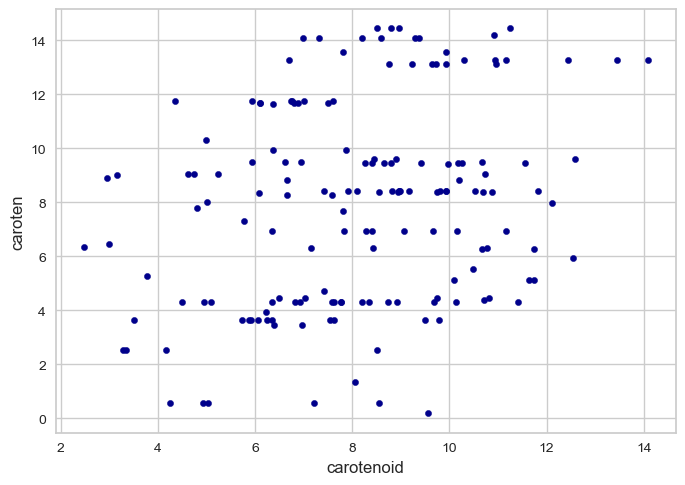

In [118]:
 ax1 = carot.plot.scatter(x='carotenoid', y='caroten', c='DarkBlue')

# Linear Model

In [124]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [125]:
X_train, X_test, y_train, y_test = train_test_split(x_car, y_car, test_size = 0.30, random_state = 0)#30% of the dataset will be left to test dataset
from sklearn.linear_model import LinearRegression
mlr_regressor = LinearRegression()
mlr_regressor.fit(X_train, y_train)
y_pred = mlr_regressor.predict(X_train)
r2_score(y_train, y_pred)

0.04264288538060501

In [119]:
khaya = pd.DataFrame(carot)
import openpyxl as xls

In [120]:
excel_file = pd.ExcelWriter('data1.xlsx')
carot.to_excel(excel_file)
excel_file.save()

C:\Users\bongo\AppData\Local\Temp\ipykernel_4592\3892605866.py:3: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  excel_file.save()


In [144]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score